In [1]:
import os
import yaml
import pandas as pd
import pickle
import sys
from datetime import datetime

sys.path.append('../src')
import ml_tools_wc as wc

#Retreive local data path
with open('../config/paths.yaml','r') as file:
    paths_list = yaml.safe_load(file)
    PATH = os.path.abspath(paths_list['PATH'])
    
# Open cleaned data
master_log_file = os.path.join(PATH,'tables','master_log.csv')
master_log = pd.read_csv(master_log_file)
master_log.head()

,Date,Model,AUC,CVaccuracy,CVf1,Note
0,10/8/2021 14:09,LogisticRegression(),1.000000,0.903810,0.897949,TC_Excl;time:d2d4d6;z-norm;FS:MRMR MIQ k=34;
1,10/8/2021 14:09,"LogisticRegression(multi_class='ovr', solver='...",0.888889,0.917143,0.909377,TC_Excl;time:d2d4d6;z-norm;FS:MRMR MIQ k=34;
2,10/8/2021 14:09,SVC(probability=True),0.948148,0.889524,0.887677,TC_Excl;time:d2d4d6;z-norm;FS:MRMR MIQ k=34;
3,10/8/2021 14:09,"SVC(kernel='linear', probability=True)",0.888889,0.904762,0.897949,TC_Excl;time:d2d4d6;z-norm;FS:MRMR MIQ k=34;
4,10/8/2021 14:09,DecisionTreeClassifier(),0.811111,0.762857,0.764304,TC_Excl;time:d2d4d6;z-norm;FS:MRMR MIQ k=34;


In [2]:
master_log.Note.unique()

array(['TC_Excl;time:d2d4d6;z-norm;FS:MRMR MIQ k=34;',
       'all;time:d2d4d6;z-norm,LogFI;FS:MRMR MIQ k=34;',
       'all;sexBal;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'all;sexBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'all;allSubj;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'all;allSubj;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'CoopExcl;sexBal;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'CoopExcl;sexBal;z-norm,allvar;time:d2d4d6;FS:MRMR MIQ k=34;',
       'CoopExcl;sexBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'radioOnlyCoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'pathOnlyCoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'immOnly;CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'CoopExcl;SexOriginBal;LASSO;z-nor

In [3]:
print('There are duplicates: ',master_log.duplicated(subset=['Note','Model']).any())

There are duplicates:  False


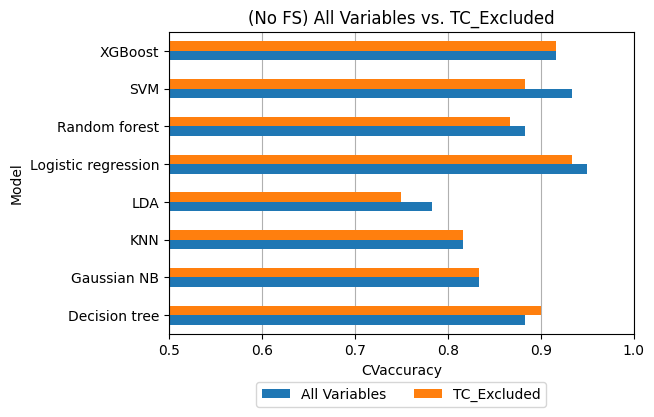

In [4]:
wc.plot_mlperformance(master_log, ['All Variables', 'TC_Excluded'],\
                ['noCoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=30.0;',\
                 'CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;'],\
                 '(No FS) ')[0]

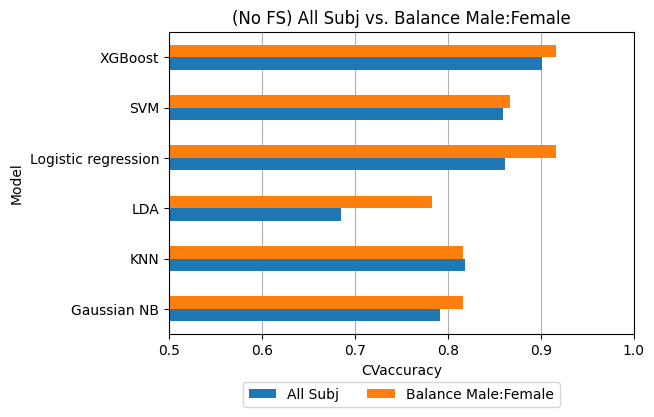

In [5]:
wc.plot_mlperformance(master_log, ['All Subj', 'Balance Male:Female'],\
                ['all;allSubj;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'all;sexBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;'],\
                 '(No FS) ')[0]

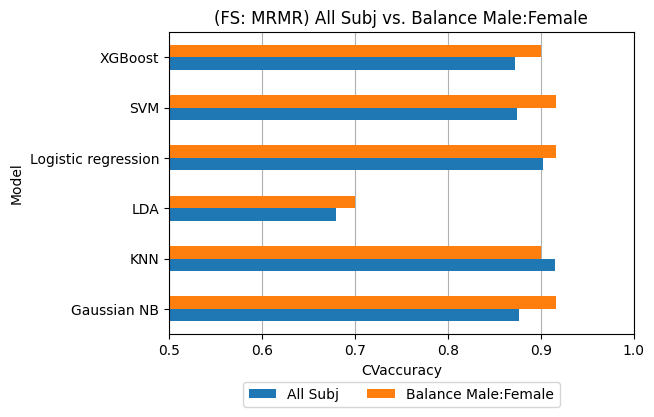

In [6]:
wc.plot_mlperformance(master_log, ['All Subj', 'Balance Male:Female'],\
                   ['all;allSubj;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                    'all;sexBal;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=34;'],\
                   '(FS: MRMR) ')[0]

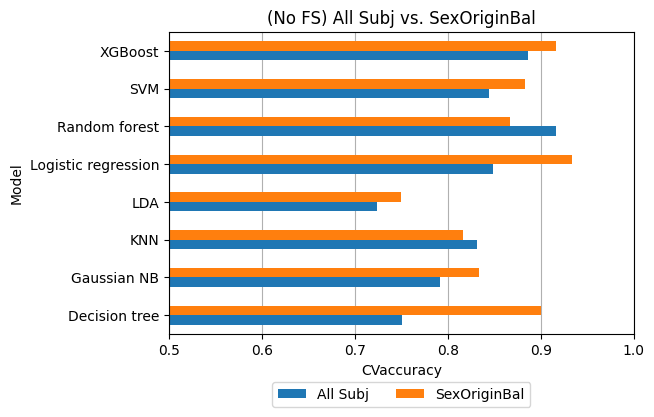

In [7]:
wc.plot_mlperformance(master_log,['All Subj','SexOriginBal'],\
                   ['CoopExcl;AllSubj;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                    'CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;'],'(No FS) ')[0]

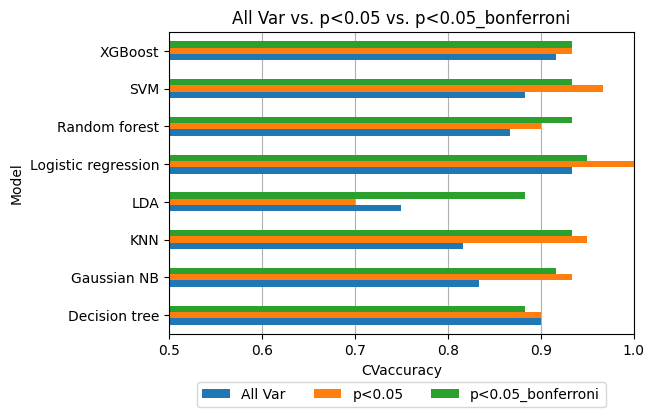

In [8]:
wc.plot_mlperformance(master_log,['All Var', 'p<0.05', 'p<0.05_bonferroni'],\
                   ['CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                    'CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;FS:2x4ANOVA,notCorrected;',\
                    'CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;FS:2x4ANOVA,Bonferroni;'])[0]

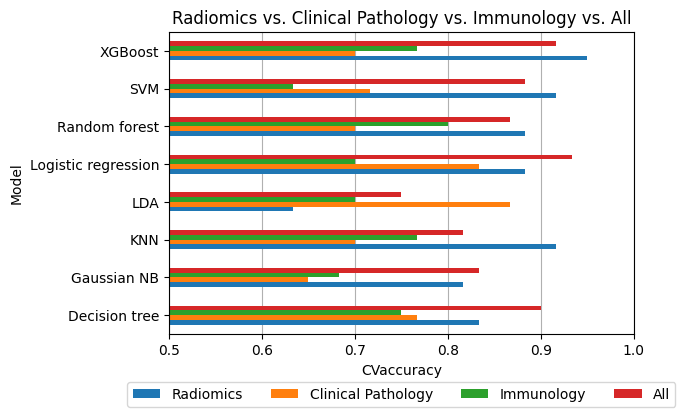

In [9]:
wc.plot_mlperformance(master_log, ['Radiomics','Clinical Pathology','Immunology','All'],\
                ['radioOnlyCoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'pathOnlyCoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'immOnly;CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;'])[0]

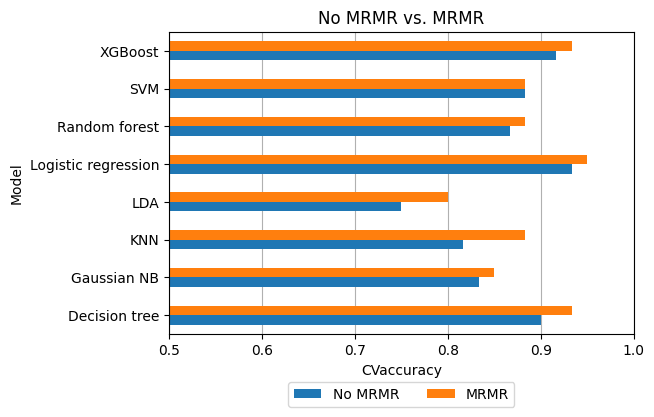

In [10]:
wc.plot_mlperformance(master_log,['No MRMR', 'MRMR'],\
                   ['CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                    'CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=34;'])[0]

# Optimization of Feature Selection

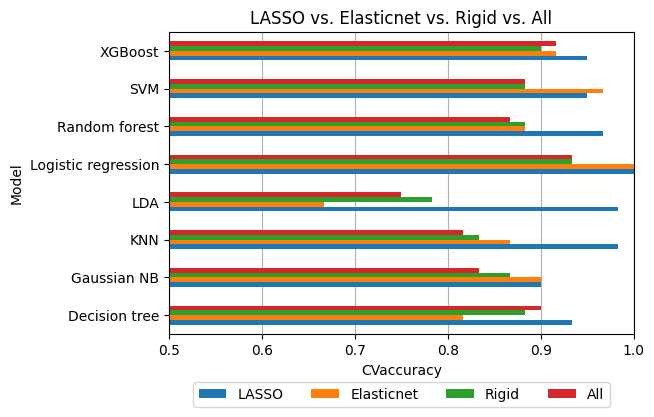

In [11]:
wc.plot_mlperformance(master_log, ['LASSO','Elasticnet','Rigid','All'],\
                ['CoopExcl;SexOriginBal;LASSO;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'CoopExcl;SexOriginBal;elasticnet;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'CoopExcl;SexOriginBal;rigid;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;'])[0]

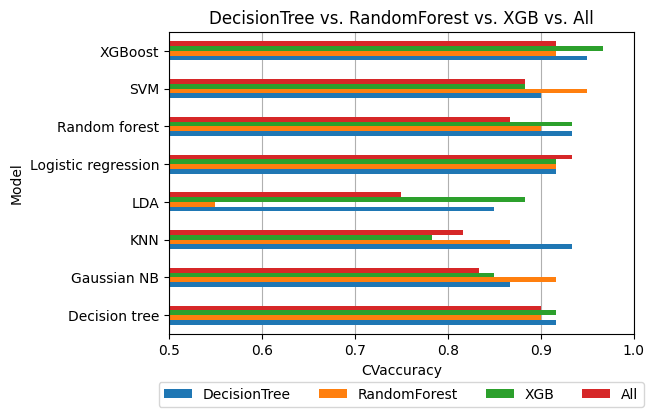

In [12]:
wc.plot_mlperformance(master_log, ['DecisionTree','RandomForest','XGB','All'],\
                ['CoopExcl;SexOriginBal;DecisionTreeFI;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'CoopExcl;SexOriginBal;RandomForestFI;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'CoopExcl;SexOriginBal;XGBFI;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;'])[0]

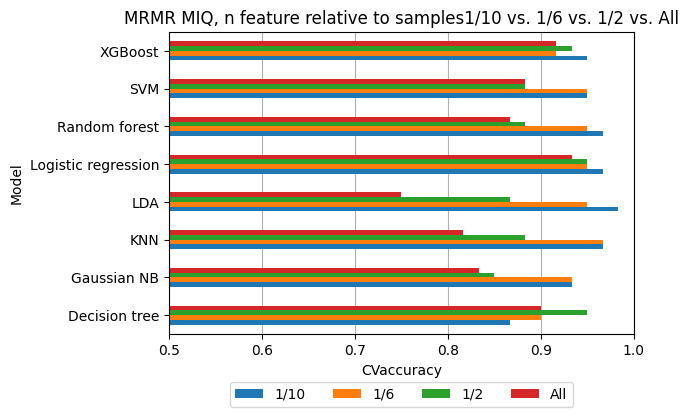

In [13]:
wc.plot_mlperformance(master_log, ['1/10','1/6','1/2','All'],\
                ['CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=6.0;',\
                 'CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=10.0;',\
                 'CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=30.0;',\
                 'CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;'],'MRMR MIQ, n feature relative to samples')[0]

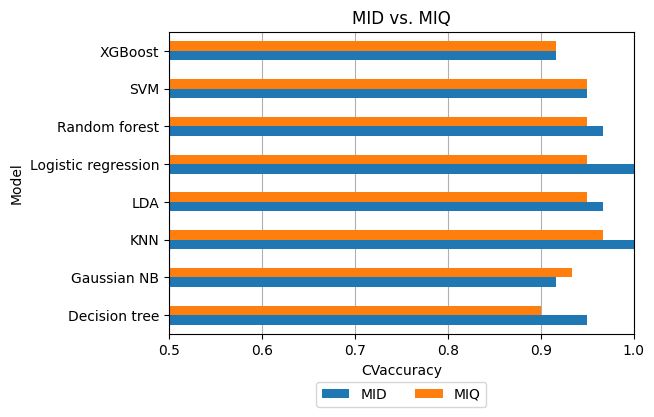

In [14]:
wc.plot_mlperformance(master_log, ['MID','MIQ'],\
                ['CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;FS:MRMR MID k=10.0;',\
                 'CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=10.0;'])[0]

In [15]:
# These results are from an old version of mRMR-permute
# wc.plot_mlperformance(master_log, ['MRMR MID (k=10)','MRMR Permute (k=124)'],\
#                 ['CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;FS:MRMR MID k=10.0;',\
#                  'CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;MRMR_permute 0.05;'])[0]

# These results are from an old version of mRMR-permute
# wc.plot_mlperformance(master_log, ['MRMR MID (k=61)','MRMR Permute (k=61)'],\
#                 ['CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;FS:MRMR MID k=61;',\
#                  'CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;MRMR_permute 0.01;'])[0]

# These results are from an old version of mRMR-permute
# wc.plot_mlperformance(master_log, ['MRMR Permute 0.05 (k=124)','MRMR Permute 0.01 (k=61)','MRMR Permute 0.005 (k=34)'],\
#                 ['CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;MRMR_permute 0.05;',\
#                  'CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;MRMR_permute 0.01;',\
#                  'CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;MRMR_permute 0.005;'])[0]

# These results are from an old version of mRMR-permute
# wc.plot_mlperformance(master_log, ['MRMR Permute 0.05','MRMR k=124','MRMR Permute 0.01',\
#                                    'MRMR k=61','MRMR Permute 0.005','MRMR k=34'],\
#                 ['CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.05;',\
#                  'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;FS:MRMR MID k=124;',\
#                  'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.01;',\
#                  'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;FS:MRMR MID k=61;',\
#                  'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.005;',\
#                  'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;FS:MRMR MID k=34;',],'Match k ')[0]

# mRMR-permute at different p-thresholds

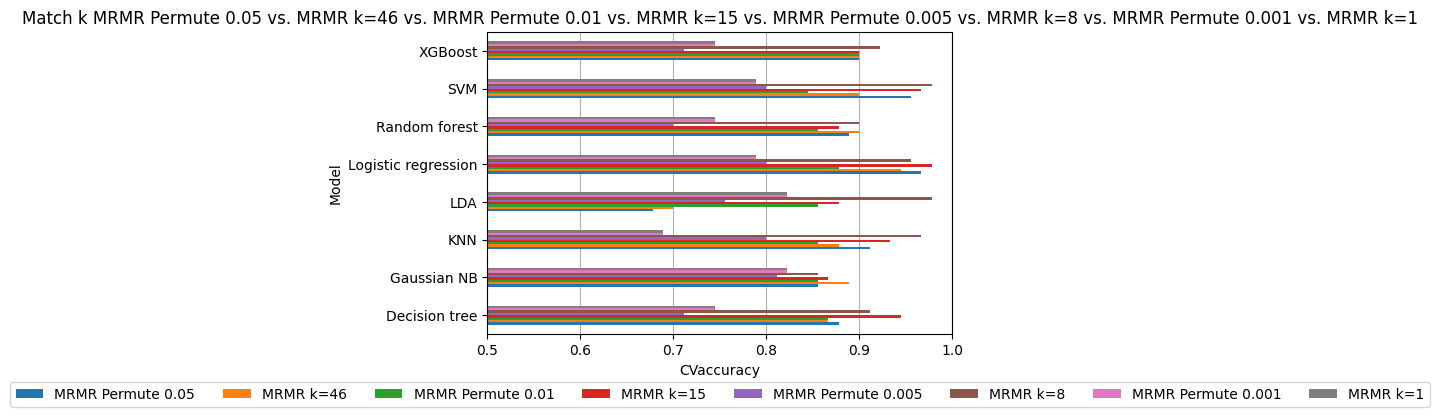

In [16]:
wc.plot_mlperformance(master_log, ['MRMR Permute 0.05','MRMR k=46',\
                                   'MRMR Permute 0.01','MRMR k=15',\
                                   'MRMR Permute 0.005','MRMR k=8',\
                                   'MRMR Permute 0.001','MRMR k=1'],\
                ['CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.05 0914;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;FS:MRMR MID k=46;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.01 0914;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;FS:MRMR MID k=15;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.005 0914;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;FS:MRMR MID k=8;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.001 0914;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;FS:MRMR MID k=1;'],'Match k ')[0]

# Stability Analysis
Interpretation:
- mRMR-permute performs well at p<0.05
- for other p-thresholds mRMR-permute is unstable and performs worse then mRMR

Trincating plot to top 3 models only


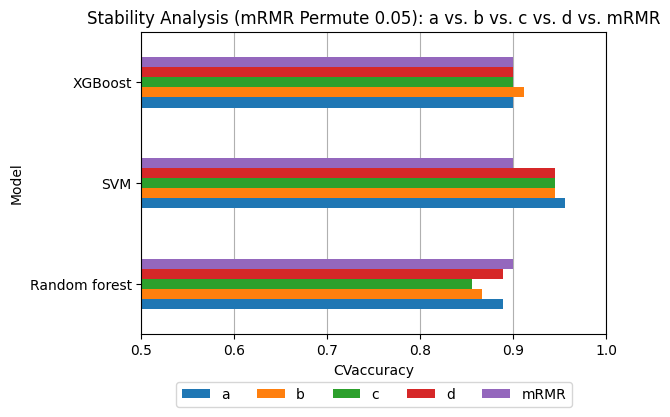

In [17]:
wc.plot_mlperformance(master_log, ['a','b','c','d','mRMR'],\
                ['CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.05(46) 0914a;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.05(50) 0914b;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.05(48) 0914c;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.05(46) 0914d;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;FS:MRMR MID k=46;'], 'Stability Analysis (mRMR Permute 0.05): ')[0]

Trincating plot to top 3 models only


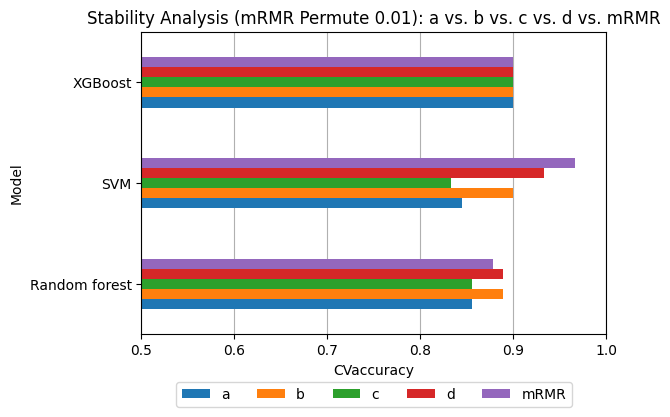

In [18]:
wc.plot_mlperformance(master_log, ['a','b','c','d','mRMR'],\
                ['CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.01 0914;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.01(17) 0915a;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.01(18) 0915b;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.01(20) 0915c;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;FS:MRMR MID k=15;'], 'Stability Analysis (mRMR Permute 0.01): ')[0]

Trincating plot to top 3 models only


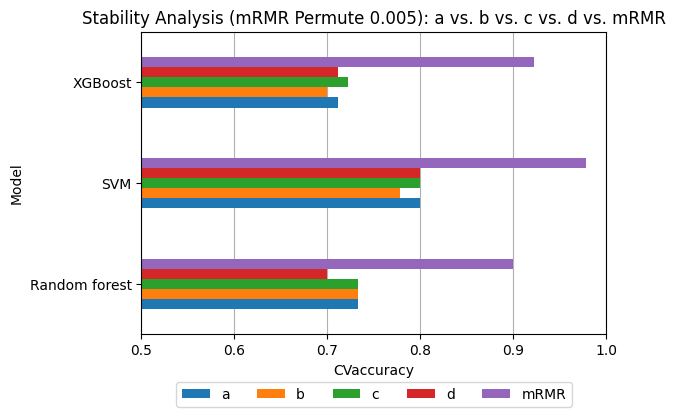

In [19]:
wc.plot_mlperformance(master_log, ['a','b','c','d','mRMR'],\
                ['CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.005(8) 0915a;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.005(7) 0915b;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.005(8) 0915c;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;MRMR_permute 0.005(8) 0915d;',\
                 'CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;FS:MRMR MID k=8;'], 'Stability Analysis (mRMR Permute 0.005): ')[0]

# Comparison with and without MC excluded features
Interpretation:
- With mRMR, Excluding MC recommended features generally reduces accuracy
- Without mRMR, Excluding MC recommended features sometimes improves but usually hurts accuracy

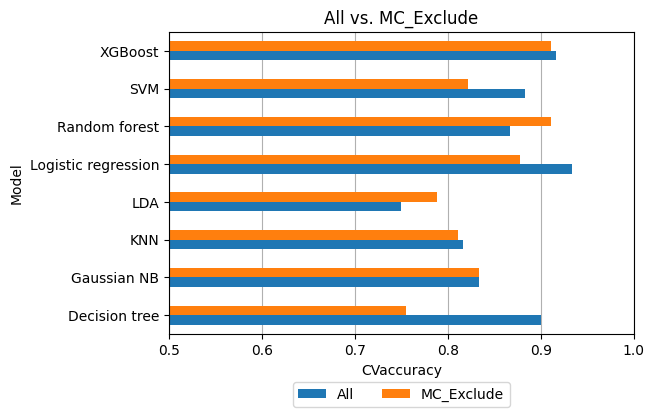

In [20]:
wc.plot_mlperformance(master_log, ['All','MC_Exclude'],\
                ['CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS;time:d2d4d6;MRMR_permute 0.05(46) 0914d;'])[0]

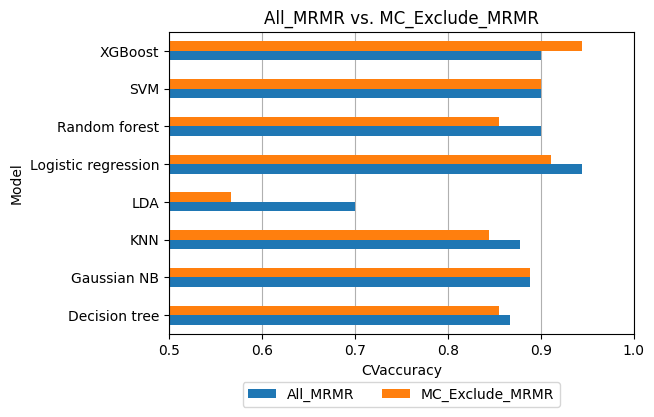

In [21]:
wc.plot_mlperformance(master_log, ['All_MRMR','MC_Exclude_MRMR'],\
                ['CoopExcl;SexOriginBal;z-norm,groupSubj,FS;time:d2d4d6;FS:MRMR MID k=46;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS;time:d2d4d6;FS:MRMR MID k=46;'])[0]

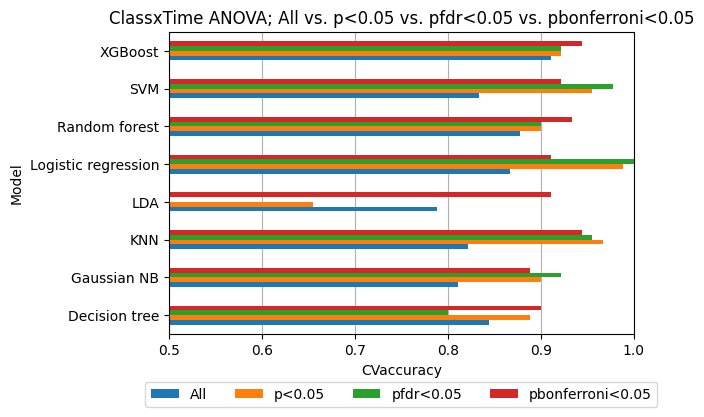

In [22]:
wc.plot_mlperformance(master_log, ['All','p<0.05','pfdr<0.05','pbonferroni<0.05'],\
                ['CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:71;time:d2d4d6;FS:2x3ANOVA,notCorrected;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:49;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:8;time:d2d4d6;FS:2x4ANOVA,Bonferroni;'],\
                     'ClassxTime ANOVA; ')[0]

- FDR corrected p<0.05 on class effect in 2x4ANOVA to train a logistic regression model is currently our best performing feature-set model combo

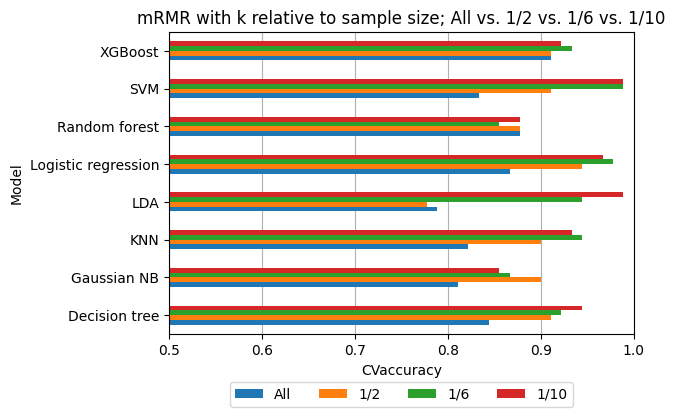

In [23]:
wc.plot_mlperformance(master_log, ['All','1/2','1/6','1/10'],\
                ['CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:30;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:10;time:d2d4d6;FS:MRMR MID k=10.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:6;time:d2d4d6;FS:MRMR MID k=6.0;'],\
                      'mRMR with k relative to sample size; ')[0]

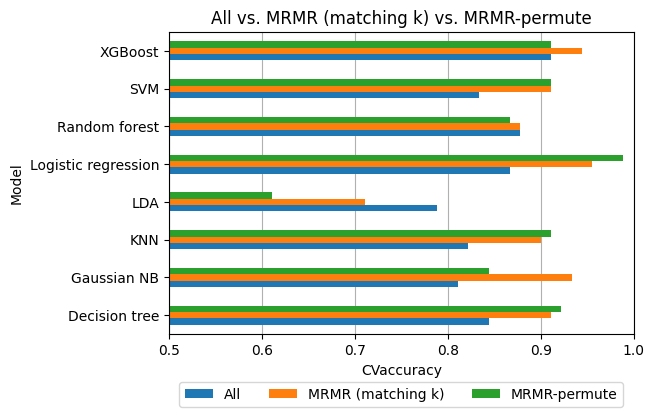

In [24]:
wc.plot_mlperformance(master_log, ['All','MRMR (matching k)','MRMR-permute'],\
                ['CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;FS:MRMR MID k=35;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;MRMR-permute 0.05;'])[0]

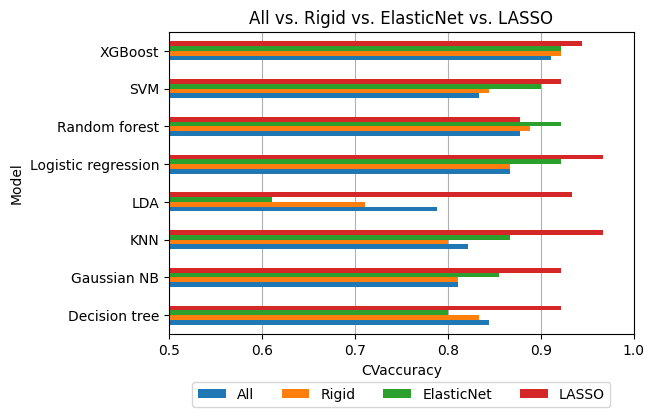

In [25]:
wc.plot_mlperformance(master_log, ['All','Rigid','ElasticNet','LASSO'],\
                ['CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                'CoopExcl;SexOriginBal;rigid:130;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;elasticnet:74;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;LASSO:10;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;'])[0]

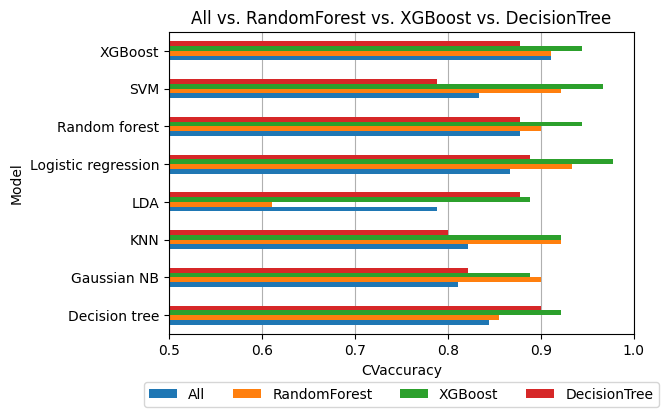

In [26]:
wc.plot_mlperformance(master_log, ['All','RandomForest','XGBoost','DecisionTree'],\
                ['CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                'CoopExcl;SexOriginBal;RandomForestFI:48;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;XGBFI:13;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;DecisionTreeFI:3;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;'])[0]

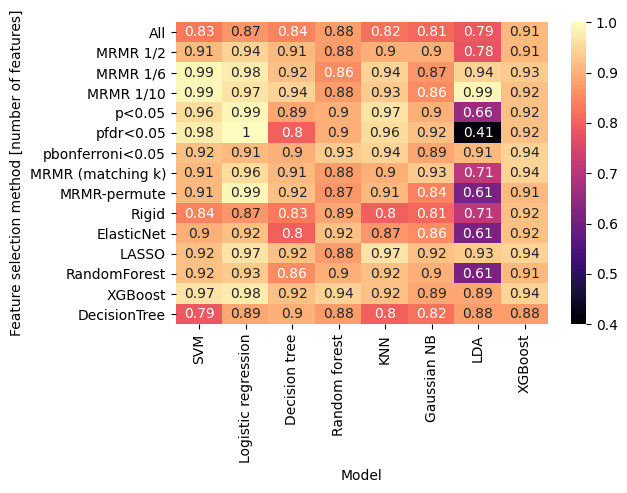

In [27]:
wc.plot_ml_matrix(master_log, ['All','MRMR 1/2','MRMR 1/6','MRMR 1/10',\
                               'p<0.05','pfdr<0.05','pbonferroni<0.05',\
                               'MRMR (matching k)','MRMR-permute',\
                               'Rigid','ElasticNet','LASSO',\
                               'RandomForest','XGBoost','DecisionTree'],\
                ['CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:30;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:10;time:d2d4d6;FS:MRMR MID k=10.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:6;time:d2d4d6;FS:MRMR MID k=6.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:71;time:d2d4d6;FS:2x3ANOVA,notCorrected;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:49;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:8;time:d2d4d6;FS:2x4ANOVA,Bonferroni;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;FS:MRMR MID k=35;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;MRMR-permute 0.05;',\
                 'CoopExcl;SexOriginBal;rigid:130;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;elasticnet:74;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;LASSO:10;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;RandomForestFI:48;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;XGBFI:13;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;DecisionTreeFI:3;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;'])

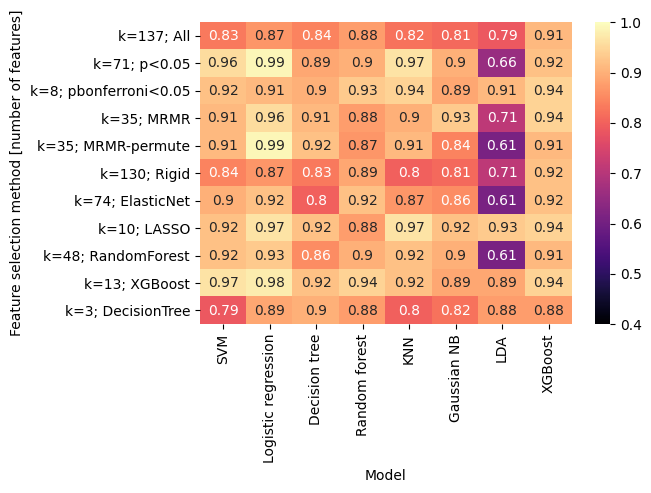

In [28]:
wc.plot_ml_matrix(master_log, ['k=137; All',\
                               'k=71; p<0.05',\
                               'k=8; pbonferroni<0.05',\
                               'k=35; MRMR',\
                               'k=35; MRMR-permute',\
                               'k=130; Rigid',\
                               'k=74; ElasticNet',\
                               'k=10; LASSO',\
                               'k=48; RandomForest',\
                               'k=13; XGBoost',\
                               'k=3; DecisionTree'],\
                [\
                'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:71;time:d2d4d6;FS:2x3ANOVA,notCorrected;',\
                'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:8;time:d2d4d6;FS:2x4ANOVA,Bonferroni;',\
                'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;FS:MRMR MID k=35;',\
                'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;MRMR-permute 0.05;',\
                'CoopExcl;SexOriginBal;rigid:130;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;elasticnet:74;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;LASSO:10;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;RandomForestFI:48;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;XGBFI:13;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                'CoopExcl;SexOriginBal;DecisionTreeFI:3;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                ])

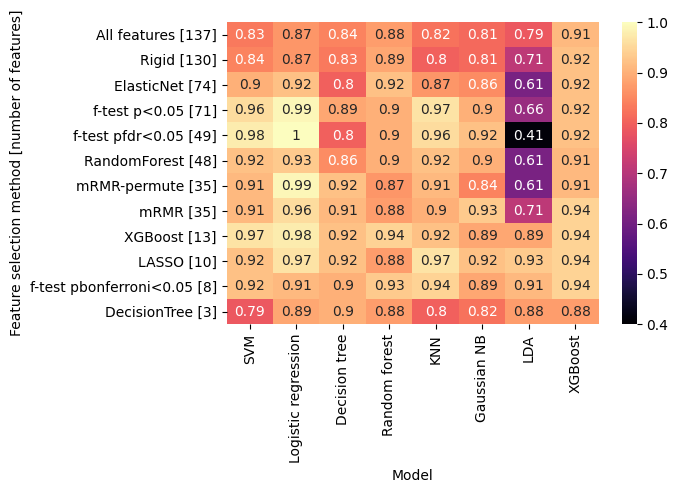

In [29]:
wc.plot_ml_matrix(master_log, [
                            'All features [137]',\
                            'Rigid [130]',\
                            'ElasticNet [74]',\
                            'f-test p<0.05 [71]',\
                            'f-test pfdr<0.05 [49]',\
                            'RandomForest [48]',\
                            'mRMR-permute [35]',\
                            'mRMR [35]',\
                            'XGBoost [13]',\
                            'LASSO [10]',\
                            'f-test pbonferroni<0.05 [8]',\
                            'DecisionTree [3]',
                                ],\
                [\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;rigid:130;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;elasticnet:74;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:71;time:d2d4d6;FS:2x3ANOVA,notCorrected;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:49;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;RandomForestFI:48;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;MRMR-permute 0.05;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;FS:MRMR MID k=35;',\
                 'CoopExcl;SexOriginBal;XGBFI:13;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;LASSO:10;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:8;time:d2d4d6;FS:2x4ANOVA,Bonferroni;',\
                 'CoopExcl;SexOriginBal;DecisionTreeFI:3;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                ])
#p1.savefig('ml_matrix.png', bbox_inches='tight')

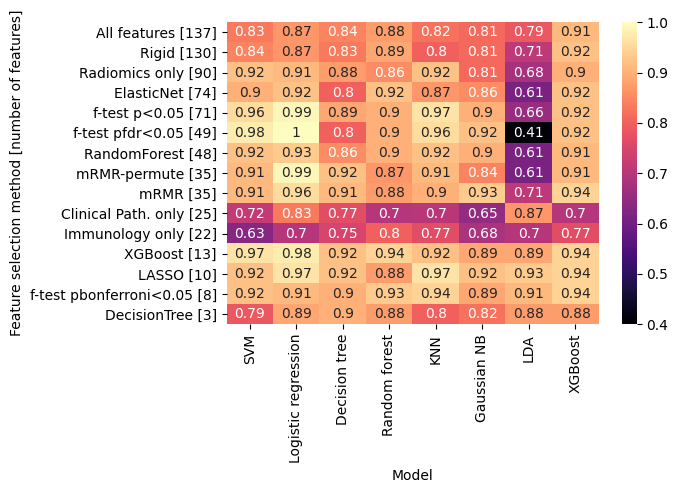

In [30]:
wc.plot_ml_matrix(master_log, [
                            'All features [137]',\
                            'Rigid [130]',\
                            'Radiomics only [90]',\
                            'ElasticNet [74]',\
                            'f-test p<0.05 [71]',\
                            'f-test pfdr<0.05 [49]',\
                            'RandomForest [48]',\
                            'mRMR-permute [35]',\
                            'mRMR [35]',\
                            'Clinical Path. only [25]',\
                            'Immunology only [22]',\
                            'XGBoost [13]',\
                            'LASSO [10]',\
                            'f-test pbonferroni<0.05 [8]',\
                            'DecisionTree [3]',
                                ],\
                [\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;rigid:130;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:90_radioOnly_;time:d2d4d6;MRMR-permute 0.05;',\
                 'CoopExcl;SexOriginBal;elasticnet:74;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:71;time:d2d4d6;FS:2x3ANOVA,notCorrected;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:49;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;RandomForestFI:48;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;MRMR-permute 0.05;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;FS:MRMR MID k=35;',\
                 'pathOnlyCoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'immOnly;CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'CoopExcl;SexOriginBal;XGBFI:13;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;LASSO:10;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:8;time:d2d4d6;FS:2x4ANOVA,Bonferroni;',\
                 'CoopExcl;SexOriginBal;DecisionTreeFI:3;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                ])
#p1.savefig('ml_matrix.png', bbox_inches='tight')

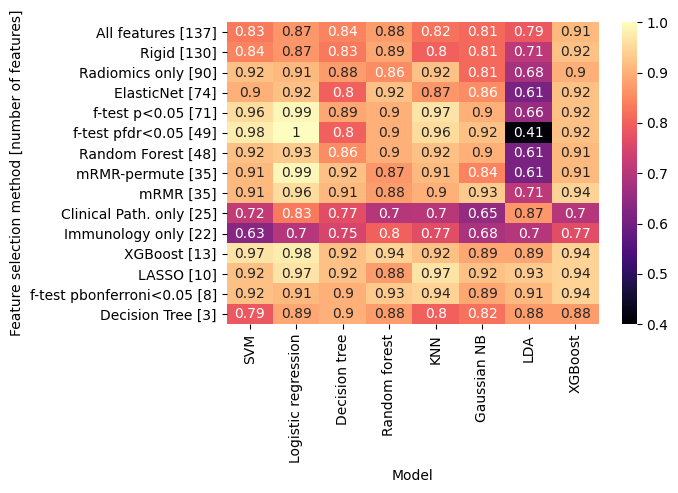

In [31]:
wc.plot_ml_matrix(master_log, [
                            'All features [137]',\
                            'Rigid [130]',\
                            'Radiomics only [90]',\
                            'ElasticNet [74]',\
                            'f-test p<0.05 [71]',\
                            'f-test pfdr<0.05 [49]',\
                            'Random Forest [48]',\
                            'mRMR-permute [35]',\
                            'mRMR [35]',\
                            'Clinical Path. only [25]',\
                            'Immunology only [22]',\
                            'XGBoost [13]',\
                            'LASSO [10]',\
                            'f-test pbonferroni<0.05 [8]',\
                            'Decision Tree [3]',
                                ],\
                [\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;rigid:130;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:90_radioOnly_;time:d2d4d6;MRMR-permute 0.05;',\
                 'CoopExcl;SexOriginBal;elasticnet:74;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:71;time:d2d4d6;FS:2x3ANOVA,notCorrected;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:49;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;RandomForestFI:48;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;MRMR-permute 0.05;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;FS:MRMR MID k=35;',\
                 'pathOnlyCoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'immOnly;CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',\
                 'CoopExcl;SexOriginBal;XGBFI:13;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;LASSO:10;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:8;time:d2d4d6;FS:2x4ANOVA,Bonferroni;',\
                 'CoopExcl;SexOriginBal;DecisionTreeFI:3;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                ])
#p1.savefig('ml_matrix.png', bbox_inches='tight')

In [32]:
p1 = wc.plot_ml_matrix(master_log, [
                            'All features [137]',\
                            'Radiomics only [90]',\
                            'Clinical path. only [25]',\
                            'Immunology only [22]',\
                            'f-test p<0.05 [71]',\
                            'f-test pfdr<0.05 [49]',\
                            'f-test pbonferroni<0.05 [8]',\
                            'mRMR-permute [35]',\
                            'mRMR [35]',\
                            'LASSO [10]',\
                            'ElasticNet [74]',\
                            'Decision tree [3]',\
                            'Random forest [48]',\
                            'XGBoost [13]',\
                                ],\
                [\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:90_radioOnly_;time:d2d4d6;MRMR-permute 0.05;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:25_pathOnly_;time:d2d4d6;MRMR-permute 0.05;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:22_immOnly_;time:d2d4d6;MRMR-permute 0.05;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:71;time:d2d4d6;FS:2x3ANOVA,notCorrected;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:49;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:8;time:d2d4d6;FS:2x4ANOVA,Bonferroni;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;MRMR-permute 0.05;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;FS:MRMR MID k=35;',\
                 'CoopExcl;SexOriginBal;LASSO:10;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;elasticnet:74;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;DecisionTreeFI:3;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;RandomForestFI:48;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;XGBFI:13;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                ])
p1.show()
# p1.savefig('ml_matrix_20220301.png', bbox_inches='tight', dpi=300)

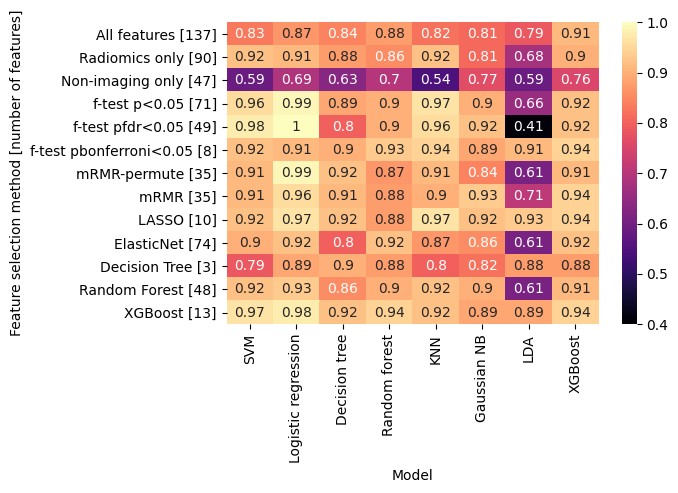

In [33]:
wc.plot_ml_matrix(master_log, [
                            'All features [137]',\
                            'Radiomics only [90]',\
                            'Non-imaging only [47]',\
                            'f-test p<0.05 [71]',\
                            'f-test pfdr<0.05 [49]',\
                            'f-test pbonferroni<0.05 [8]',\
                            'mRMR-permute [35]',\
                            'mRMR [35]',\
                            'LASSO [10]',\
                            'ElasticNet [74]',\
                            'Decision Tree [3]',\
                            'Random Forest [48]',\
                            'XGBoost [13]',\
                                ],\
                [\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:90_radioOnly_;time:d2d4d6;MRMR-permute 0.05;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,noFS:47_pathimmOnly_;time:d2d4d6;MRMR-permute 0.05;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:71;time:d2d4d6;FS:2x3ANOVA,notCorrected;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:49;time:d2d4d6;FS:2x3ANOVA,fdr;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:8;time:d2d4d6;FS:2x4ANOVA,Bonferroni;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;MRMR-permute 0.05;',\
                 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;FS:MRMR MID k=35;',\
                 'CoopExcl;SexOriginBal;LASSO:10;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;elasticnet:74;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;DecisionTreeFI:3;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;RandomForestFI:48;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                 'CoopExcl;SexOriginBal;XGBFI:13;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;FS:MRMR MID k=30.0;',\
                ])
#p1.savefig('ml_matrix.png', bbox_inches='tight')

In [34]:
master_log.loc[master_log.Note == 'CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,groupSubj,FS:35;time:d2d4d6;MRMR-permute 0.05;']

,Date,Model,AUC,CVaccuracy,CVf1,Note
679,2021-10-13 16:31:21,LogisticRegression(),1.000000,0.988889,0.971429,"CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,gro..."
680,2021-10-13 16:31:21,"LogisticRegression(multi_class='ovr', solver='...",1.000000,0.977778,0.979540,"CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,gro..."
681,2021-10-13 16:31:22,SVC(probability=True),1.000000,0.911111,0.881818,"CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,gro..."
682,2021-10-13 16:31:22,"SVC(kernel='linear', probability=True)",1.000000,0.977778,0.979540,"CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,gro..."
683,2021-10-13 16:31:23,DecisionTreeClassifier(),1.000000,0.922222,0.885333,"CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,gro..."
684,2021-10-13 16:31:24,RandomForestClassifier(),1.000000,0.866667,0.845073,"CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,gro..."
685,2021-10-13 16:31:25,KNeighborsClassifier(),1.000000,0.911111,0.880519,"CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,gro..."
686,2021-10-13 16:31:25,GaussianNB(),0.916667,0.844444,0.799934,"CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,gro..."
687,2021-10-13 16:31:25,LinearDiscriminantAnalysis(),0.166667,0.611111,0.609095,"CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,gro..."
688,2021-10-13 16:31:39,"XGBClassifier(base_score=0.5, booster='gbtree'...",1.000000,0.911111,0.880038,"CoopExcl;SexOriginBal;radioExcl_MC;;z-norm,gro..."


In [35]:
master_log.Note.unique()

array(['TC_Excl;time:d2d4d6;z-norm;FS:MRMR MIQ k=34;',
       'all;time:d2d4d6;z-norm,LogFI;FS:MRMR MIQ k=34;',
       'all;sexBal;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'all;sexBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'all;allSubj;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'all;allSubj;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'CoopExcl;sexBal;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'CoopExcl;sexBal;z-norm,allvar;time:d2d4d6;FS:MRMR MIQ k=34;',
       'CoopExcl;sexBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'CoopExcl;SexOriginBal;z-norm,FS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'radioOnlyCoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'pathOnlyCoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'immOnly;CoopExcl;SexOriginBal;z-norm,noFS;time:d2d4d6;FS:MRMR MIQ k=34;',
       'CoopExcl;SexOriginBal;LASSO;z-nor